<a href="https://www.kaggle.com/code/lalit7881/consistent-ml-performance-at-84-6-accuracy?scriptVersionId=293230148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/afcon-202526-complete-match-statistics/afcon_2025_2026_dataset.csv


## AFCON 2025–26: Complete Match Statistics Overview

## Description:
This dataset provides a comprehensive statistical breakdown of all matches played during the AFCON 2025–26 tournament. It covers match-level details including teams, scores, venues, match stages, and outcomes, along with in-depth performance metrics such as goals, possession, shots, passes, fouls, cards, and substitutions. The statistics enable detailed analysis of team strategies, player efficiency, tactical trends, and tournament progression. Ideal for football analytics, performance evaluation, predictive modeling, and sports data visualization.

In [2]:
df = pd.read_csv(
    "/kaggle/input/afcon-202526-complete-match-statistics/afcon_2025_2026_dataset.csv",
    on_bad_lines="skip"
)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          49 non-null     object 
 1   Team1                         49 non-null     object 
 2   Team2                         49 non-null     object 
 3   Score (Team1 - Team2)         49 non-null     object 
 4   FullTimeResult                49 non-null     object 
 5   Venue                         49 non-null     object 
 6   City                          49 non-null     object 
 7   Attendance                    49 non-null     int64  
 8   Goal Scorers Team 1           37 non-null     object 
 9   Goal Scorers Team 2           33 non-null     object 
 10  Team 1 Possession percentage  49 non-null     float64
 11  Team 2 Possession percentage  49 non-null     float64
 12  Team 1 Shots on Goal          49 non-null     int64  
 13  Team 2 

In [4]:
df.head()

,Date,Team1,Team2,Score (Team1 - Team2),FullTimeResult,Venue,City,Attendance,Goal Scorers Team 1,Goal Scorers Team 2,...,Team 1 Shots on Goal,Team 2 Shots on Goal,Team 1 Shot Attempts,Team 2 Shot Attempts,Team 1 Yellow Cards,Team 2 Yellow Cards,Team 1 Corner Kicks,Team 2 Corner Kicks,Team 1 Saves,Team 2 Saves
0,2025-12-22,Morocco,Comoros,2 - 0,FT,Stade Prince Moulay Abdallah,Rabat,60180,Brahim Díaz - 55'Ayoub El Kaabi - 74',NaN,...,7,2,16,4,3,1,5,0,2,5
1,2025-12-22,Mali,Zambia,1 - 1,FT,Mohamed V Stadium,Casablanca,10124,Lassine Sinayoko - 61',Patson Daka - 90'+2',...,5,2,15,7,1,1,6,5,1,4
2,2025-12-22,South Africa,Angola,2 - 1,FT,Stade de Marrakech,Marrakech,4013,Oswin Appollis - 21'Lyle Foster - 79',Show - 35’,...,4,4,10,10,2,2,1,9,3,2
3,2025-12-23,Egypt,Zimbabwe,2 - 1,FT,Le Grand Stade Agadir,Agadir,28199,Omar Marmoush - 64'Mohamed Salah - 90'+1',Prince Dube - 20',...,11,3,35,8,2,2,8,3,2,9
4,2025-12-23,Congo DR,Benin,1 - 0,FT,Stade El Barid,Rabat,13073,Théo Bongonda - 16'\r\n\r\n\r\n,NaN,...,3,2,11,12,3,3,5,5,2,2


In [5]:
df.tail()

,Date,Team1,Team2,Score (Team1 - Team2),FullTimeResult,Venue,City,Attendance,Goal Scorers Team 1,Goal Scorers Team 2,...,Team 1 Shots on Goal,Team 2 Shots on Goal,Team 1 Shot Attempts,Team 2 Shot Attempts,Team 1 Yellow Cards,Team 2 Yellow Cards,Team 1 Corner Kicks,Team 2 Corner Kicks,Team 1 Saves,Team 2 Saves
44,2026-01-11,Egypt,Ivory Coast,3 - 2,FT,Le Grand Stade Agadir,Agadir,31213,Omar Marmoush - 4'Ramy Rabia - 32' Mohamed Sal...,Ahmed Fatouh - 40' OGGuela Doué - 73',...,4,4,6,13,2,0,3,7,3,1
45,2026-01-14,Senegal,Egypt,1 - 0,FT,Ibn Batouta Stadium,Tanger,52079,Sadio Mané - 78',NaN,...,4,1,12,3,2,1,7,1,1,3
46,2026-01-15,Nigeria,Morocco,0 - 0,FT-Pens,Stade Prince Moulay Abdallah,Rabat,65458,NaN,,...,1,5,2,16,2,0,1,5,5,1
47,2026-01-17,Egypt,Nigeria,0 - 0,FT-Pens,Mohamed V Stadium,Casablanca,38113,NaN,,...,1,4,5,4,0,3,2,4,4,1
48,2026-01-19,Senegal,Morocco,1 - 0,AET,Stade Prince Moulay Abdallah,Rabat,66526,Pape Gueye - 94',NaN,...,7,4,14,21,5,2,8,10,4,6


In [6]:
df.describe()

,Attendance,Team 1 Possession percentage,Team 2 Possession percentage,Team 1 Shots on Goal,Team 2 Shots on Goal,Team 1 Shot Attempts,Team 2 Shot Attempts,Team 1 Yellow Cards,Team 2 Yellow Cards,Team 1 Corner Kicks,Team 2 Corner Kicks,Team 1 Saves,Team 2 Saves
count,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,26557.448980,51.751020,47.657143,4.326531,3.22449,12.224490,10.510204,2.122449,2.020408,4.836735,4.244898,2.265306,3.061224
std,18949.549364,12.075321,12.058296,3.268459,2.07430,5.969594,5.000510,1.348342,1.600648,2.392235,2.586267,1.655490,2.680238
min,4013.000000,27.000000,22.500000,0.000000,0.00000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11444.000000,43.200000,40.000000,2.000000,2.00000,9.000000,6.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000
50%,18837.000000,52.900000,47.100000,4.000000,3.00000,12.000000,10.000000,2.000000,2.000000,5.000000,4.000000,2.000000,2.000000
75%,35200.000000,59.100000,56.000000,6.000000,4.00000,15.000000,13.000000,3.000000,3.000000,6.000000,6.000000,3.000000,4.000000
max,66526.000000,77.500000,72.000000,17.000000,9.00000,35.000000,21.000000,5.000000,8.000000,11.000000,11.000000,7.000000,14.000000


In [7]:
df.isnull().sum()

Date                             0
Team1                            0
Team2                            0
Score (Team1 - Team2)            0
FullTimeResult                   0
Venue                            0
City                             0
Attendance                       0
Goal Scorers Team 1             12
Goal Scorers Team 2             16
Team 1 Possession percentage     0
Team 2 Possession percentage     0
Team 1 Shots on Goal             0
Team 2 Shots on Goal             0
Team 1 Shot Attempts             0
Team 2 Shot Attempts             0
Team 1 Yellow Cards              0
Team 2 Yellow Cards              0
Team 1 Corner Kicks              0
Team 2 Corner Kicks              0
Team 1 Saves                     0
Team 2 Saves                     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Date                             object
Team1                            object
Team2                            object
Score (Team1 - Team2)            object
FullTimeResult                   object
Venue                            object
City                             object
Attendance                        int64
Goal Scorers Team 1              object
Goal Scorers Team 2              object
Team 1 Possession percentage    float64
Team 2 Possession percentage    float64
Team 1 Shots on Goal              int64
Team 2 Shots on Goal              int64
Team 1 Shot Attempts              int64
Team 2 Shot Attempts              int64
Team 1 Yellow Cards               int64
Team 2 Yellow Cards               int64
Team 1 Corner Kicks               int64
Team 2 Corner Kicks               int64
Team 1 Saves                      int64
Team 2 Saves                      int64
dtype: object

In [10]:
df.shape

(49, 22)

In [11]:
df.columns

Index(['Date', 'Team1', 'Team2', 'Score (Team1 - Team2)', 'FullTimeResult',
       'Venue', 'City', 'Attendance', 'Goal Scorers Team 1',
       'Goal Scorers Team 2', 'Team 1 Possession percentage',
       'Team 2 Possession percentage', 'Team 1 Shots on Goal',
       'Team 2 Shots on Goal', 'Team 1 Shot Attempts', 'Team 2 Shot Attempts',
       'Team 1 Yellow Cards', 'Team 2 Yellow Cards', 'Team 1 Corner Kicks',
       'Team 2 Corner Kicks', 'Team 1 Saves', 'Team 2 Saves'],
      dtype='object')

In [12]:
df.isna().sum()

Date                             0
Team1                            0
Team2                            0
Score (Team1 - Team2)            0
FullTimeResult                   0
Venue                            0
City                             0
Attendance                       0
Goal Scorers Team 1             12
Goal Scorers Team 2             16
Team 1 Possession percentage     0
Team 2 Possession percentage     0
Team 1 Shots on Goal             0
Team 2 Shots on Goal             0
Team 1 Shot Attempts             0
Team 2 Shot Attempts             0
Team 1 Yellow Cards              0
Team 2 Yellow Cards              0
Team 1 Corner Kicks              0
Team 2 Corner Kicks              0
Team 1 Saves                     0
Team 2 Saves                     0
dtype: int64

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [14]:
df['Attendance'] = (
    df['Attendance']
    .astype(str)
    .str.replace(',', '')
    .astype(float)
)


In [15]:
df[['Team1_Goals', 'Team2_Goals']] = (
    df['Score (Team1 - Team2)']
    .str.split('-', expand=True)
    .astype(int)
)


In [16]:
df.drop(
    columns=[
        'Score (Team1 - Team2)',
        'Goal Scorers Team 1',
        'Goal Scorers Team 2',
        'City'
    ],
    inplace=True
)


## Data visualizations

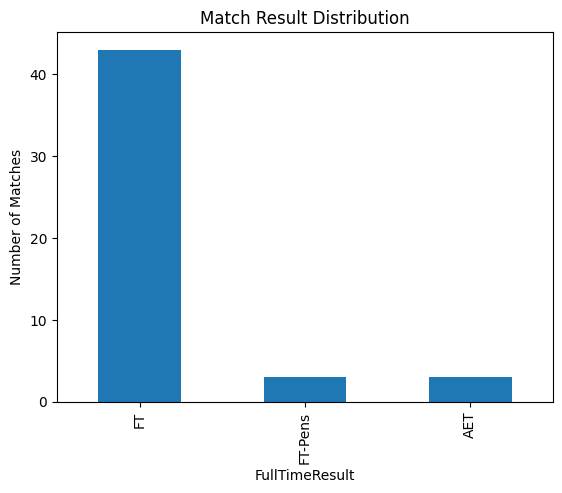

In [17]:
df['FullTimeResult'].value_counts().plot(kind='bar')
plt.title('Match Result Distribution')
plt.ylabel('Number of Matches')
plt.show()


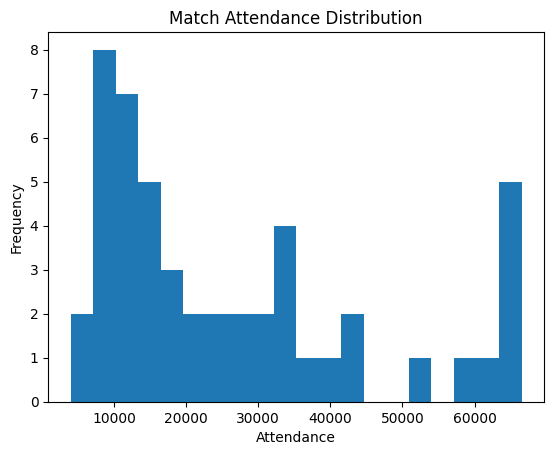

In [18]:
plt.hist(df['Attendance'], bins=20)
plt.title('Match Attendance Distribution')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()


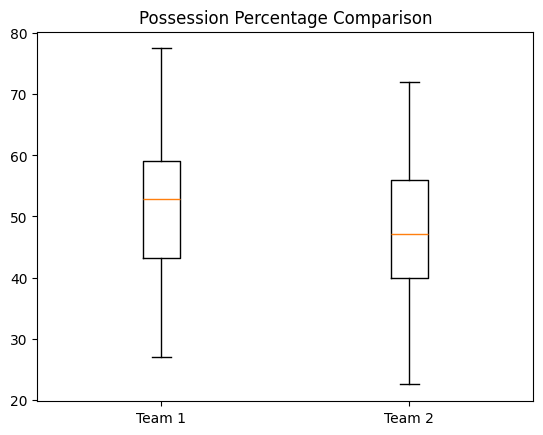

In [19]:
plt.boxplot([
    df['Team 1 Possession percentage'],
    df['Team 2 Possession percentage']
])
plt.xticks([1, 2], ['Team 1', 'Team 2'])
plt.title('Possession Percentage Comparison')
plt.show()


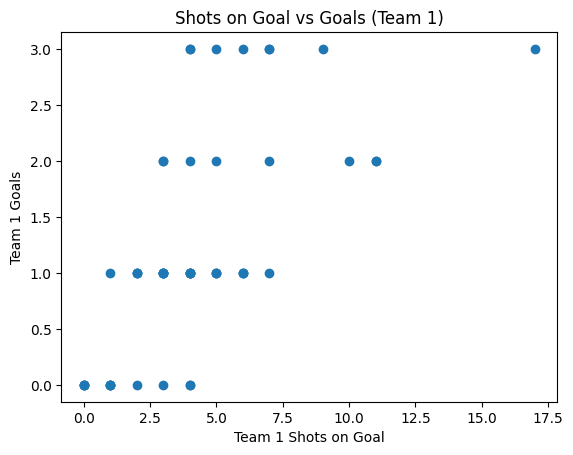

In [20]:
plt.scatter(df['Team 1 Shots on Goal'], df['Team1_Goals'])
plt.xlabel('Team 1 Shots on Goal')
plt.ylabel('Team 1 Goals')
plt.title('Shots on Goal vs Goals (Team 1)')
plt.show()


## ML

In [21]:
y = df['FullTimeResult']


In [22]:
X = df.drop(columns=['FullTimeResult', 'Date', 'Venue', 'Team1', 'Team2'])


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [26]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr.predict(X_test))


In [27]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))


In [28]:
svm = SVC()
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))


In [29]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy (%)': [
        lr_acc * 100,
        rf_acc * 100,
        svm_acc * 100
    ]
})

results


,Model,Accuracy (%)
0,Logistic Regression,84.615385
1,Random Forest,84.615385
2,SVM,84.615385


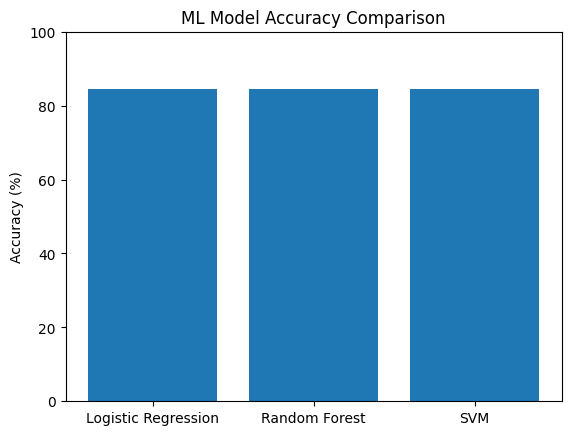

In [30]:
plt.bar(results['Model'], results['Accuracy (%)'])
plt.ylabel('Accuracy (%)')
plt.title('ML Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()


## Thank you..pls upvote!!!!